<a href="https://colab.research.google.com/github/chetanmalviya513/Stock_Prediction_With_LSTM/blob/main/TCS_NSE_Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import the Libraries
import pandas as pd
import numpy as np
import datetime 
from sklearn import datasets
import pandas_datareader as web
from pandas.io.formats.style_render import DataFrame
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Dropout, LSTM, Bidirectional
import matplotlib.pyplot as plt
#plt.style.use('fivethirtyeight')

In [ ]:
from google.colab import files
dataset = files.upload()

Saving TCS.NS (1).csv to TCS.NS (1).csv


In [ ]:
Tcs_stock = pd.read_csv("TCS.NS (1).csv")
Tcs_stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-15,1144.425049,1145.849976,1127.500000,1130.550049,974.876221,3269408
1,2016-01-18,1131.000000,1145.949951,1130.000000,1138.824951,982.011841,2213922
2,2016-01-19,1138.500000,1150.000000,1134.150024,1139.650024,982.723267,967910
3,2016-01-20,1136.900024,1142.500000,1121.500000,1140.050049,983.068054,1615954
4,2016-01-21,1142.500000,1144.949951,1122.875000,1127.250000,974.381287,2675536


In [ ]:
Tcs_stock.shape

(1808, 7)

In [ ]:
Tcs_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1808 entries, 0 to 1807
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1808 non-null   object 
 1   Open       1808 non-null   float64
 2   High       1808 non-null   float64
 3   Low        1808 non-null   float64
 4   Close      1808 non-null   float64
 5   Adj Close  1808 non-null   float64
 6   Volume     1808 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 99.0+ KB


In [ ]:
Tcs_stock = Tcs_stock[['Date','Open','Close']] # Extracting required columns
Tcs_stock['Date'] = pd.to_datetime(Tcs_stock['Date'].apply(lambda x: x.split()[0])) # Selecting only date
Tcs_stock.set_index('Date',drop=True,inplace=True) # Setting date column as index
Tcs_stock.head()

<ipython-input-7-c7ee207ad0bc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tcs_stock['Date'] = pd.to_datetime(Tcs_stock['Date'].apply(lambda x: x.split()[0])) # Selecting only date


,Open,Close
Date,,
2016-01-15,1144.425049,1130.550049
2016-01-18,1131.000000,1138.824951
2016-01-19,1138.500000,1139.650024
2016-01-20,1136.900024,1140.050049
2016-01-21,1142.500000,1127.250000


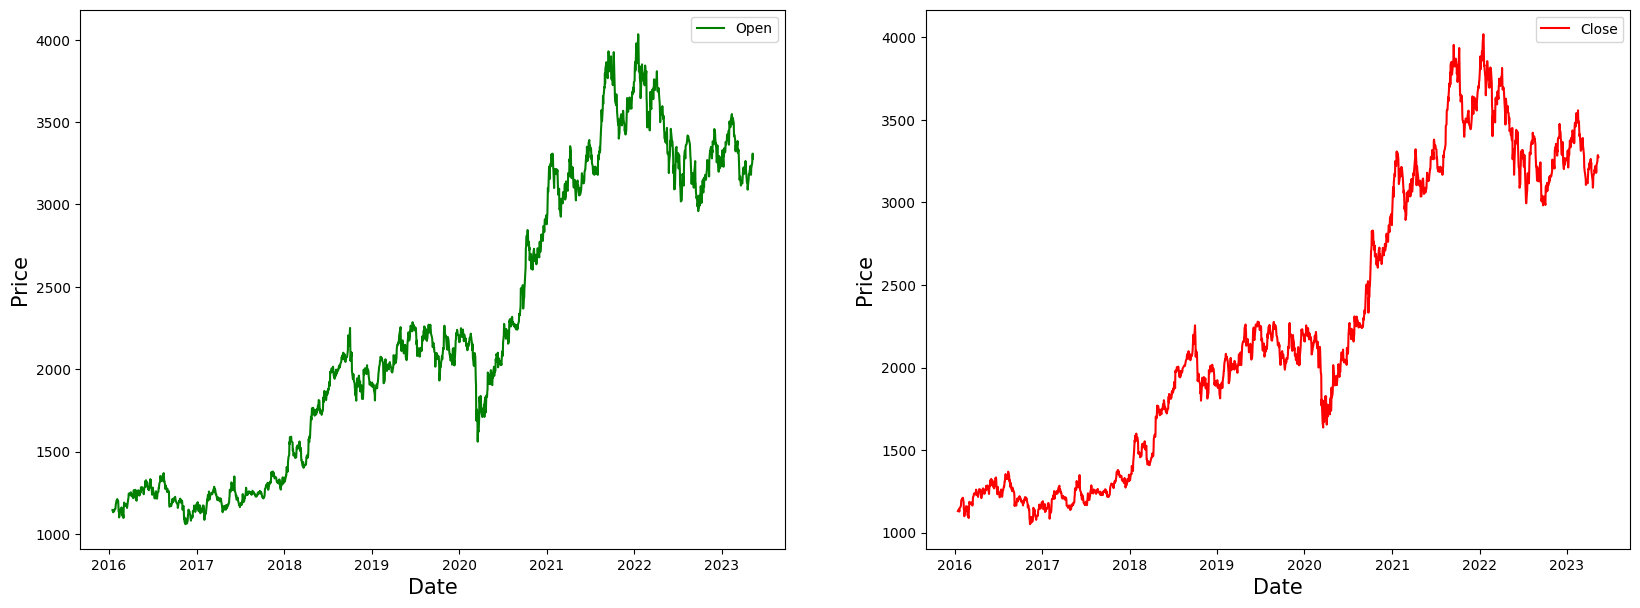

In [ ]:
fg, ax =plt.subplots(1,2,figsize=(20,7))
ax[0].plot(Tcs_stock ['Open'],label='Open',color='green')
ax[0].set_xlabel('Date',size=15)
ax[0].set_ylabel('Price',size=15)
ax[0].legend()
ax[1].plot(Tcs_stock ['Close'],label='Close',color='red')
ax[1].set_xlabel('Date',size=15)
ax[1].set_ylabel('Price',size=15)
ax[1].legend()
fg.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
MMS = MinMaxScaler()
Tcs_stock[Tcs_stock.columns] = MMS.fit_transform(Tcs_stock)

In [ ]:
# Selecting 80 % for training and 20 % for testing
training_size = round(len(Tcs_stock ) * 0.80)
training_size

1446

In [ ]:
train_data = Tcs_stock [:training_size]
test_data  = Tcs_stock [training_size:]
train_data.shape, Tcs_stock.shape

((1446, 2), (1808, 2))

In [ ]:
# Function to create sequence of data for training and testing
def create_sequence(dataset):
  sequences = []
  labels = []

  start_idx = 0

  for stop_idx in range(50,len(dataset)): # Selecting 50 rows at a time
    sequences.append(dataset.iloc[start_idx:stop_idx])
    labels.append(dataset.iloc[stop_idx])
    start_idx += 1
  return (np.array(sequences),np.array(labels))

In [ ]:
train_seq, train_label = create_sequence(train_data)
test_seq, test_label = create_sequence(test_data)

In [ ]:
train_seq.shape, train_label.shape, test_seq.shape, test_label.shape

((1396, 50, 2), (1396, 2), (312, 50, 2), (312, 2))

In [ ]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape = (train_seq.shape[1], train_seq.shape[2])))

model.add(Dropout(0.1)) 
model.add(LSTM(units=50))

model.add(Dense(2))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 50)            10600     
                                                                 
 dropout (Dropout)           (None, 50, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 2)                 102       
                                                                 
Total params: 30,902
Trainable params: 30,902
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(train_seq, train_label, epochs=80,validation_data=(test_seq, test_label), verbose=1)

Epoch 1/80
44/44 [==============================] - 6s 62ms/step - loss: 0.0227 - mean_absolute_error: 0.0888 - val_loss: 0.0017 - val_mean_absolute_error: 0.0353
Epoch 2/80
44/44 [==============================] - 2s 45ms/step - loss: 9.6018e-04 - mean_absolute_error: 0.0222 - val_loss: 0.0013 - val_mean_absolute_error: 0.0280
Epoch 3/80
44/44 [==============================] - 2s 45ms/step - loss: 8.2148e-04 - mean_absolute_error: 0.0208 - val_loss: 0.0019 - val_mean_absolute_error: 0.0334
Epoch 4/80
44/44 [==============================] - 2s 49ms/step - loss: 8.1630e-04 - mean_absolute_error: 0.0207 - val_loss: 0.0011 - val_mean_absolute_error: 0.0269
Epoch 5/80
44/44 [==============================] - 2s 53ms/step - loss: 7.6259e-04 - mean_absolute_error: 0.0201 - val_loss: 0.0023 - val_mean_absolute_error: 0.0372
Epoch 6/80
44/44 [==============================] - 2s 45ms/step - loss: 7.1987e-04 - mean_absolute_error: 0.0195 - val_loss: 9.5021e-04 - val_mean_absolute_error: 0.025

In [ ]:
test_predicted = model.predict(test_seq)
test_predicted[:20]

10/10 [==============================] - 1s 11ms/step


array([[0.939843  , 0.93606675],
       [0.93088216, 0.9271447 ],
       [0.92301166, 0.91946775],
       [0.9204558 , 0.9172112 ],
       [0.9247674 , 0.92177093],
       [0.9138921 , 0.91046965],
       [0.91193086, 0.90888155],
       [0.92868847, 0.92625433],
       [0.93970436, 0.93704665],
       [0.9368402 , 0.93376064],
       [0.9319256 , 0.9289155 ],
       [0.9228875 , 0.91990376],
       [0.88989484, 0.8864492 ],
       [0.8701676 , 0.8674358 ],
       [0.8328982 , 0.83003855],
       [0.8332169 , 0.8315182 ],
       [0.84451115, 0.8429257 ],
       [0.85253865, 0.85060227],
       [0.8540352 , 0.8518753 ],
       [0.8456608 , 0.8434038 ]], dtype=float32)

In [ ]:
test_inverse_predicted = MMS.inverse_transform(test_predicted)
test_inverse_predicted[:20]

array([[3854.9526, 3829.3594],
       [3828.2896, 3802.8733],
       [3804.871 , 3780.0837],
       [3797.266 , 3773.385 ],
       [3810.0952, 3786.9211],
       [3777.7356, 3753.3723],
       [3771.9001, 3748.658 ],
       [3821.7622, 3800.2302],
       [3854.54  , 3832.2683],
       [3846.0178, 3822.5134],
       [3831.3943, 3808.1304],
       [3804.5015, 3781.3782],
       [3706.332 , 3682.066 ],
       [3647.6338, 3625.6233],
       [3536.7383, 3514.6067],
       [3537.6868, 3518.999 ],
       [3571.293 , 3552.863 ],
       [3595.1785, 3575.6516],
       [3599.6316, 3579.4307],
       [3574.7136, 3554.2825]], dtype=float32)

In [ ]:
# Merging actual and predicted data for better visualization

gs_slic_data = pd.concat([Tcs_stock.iloc[-312:].copy(),pd.DataFrame(test_inverse_predicted,columns=['Open_predicted','Close_predicted'],index=Tcs_stock.iloc[-312:].index)], axis=1)

In [ ]:
gs_slic_data[['Open','Close']] =MMS.inverse_transform(gs_slic_data[['Open','Close']]) # Inverse scaling

In [ ]:
gs_slic_data.head(10)

,Open,Close,Open_predicted,Close_predicted
Date,,,,
2022-02-07,3791.000000,3779.000000,3854.952637,3829.359375
2022-02-08,3791.550049,3743.449951,3828.289551,3802.873291
2022-02-09,3750.000000,3760.550049,3804.871094,3780.083740
2022-02-10,3789.800049,3770.350098,3797.266113,3773.385010
2022-02-11,3752.500000,3694.949951,3810.095215,3786.921143
2022-02-14,3724.000000,3733.750000,3777.735596,3753.372314
2022-02-15,3786.000000,3817.800049,3771.900146,3748.657959
2022-02-16,3844.000000,3813.100098,3821.762207,3800.230225
2022-02-17,3825.000000,3784.199951,3854.540039,3832.268311


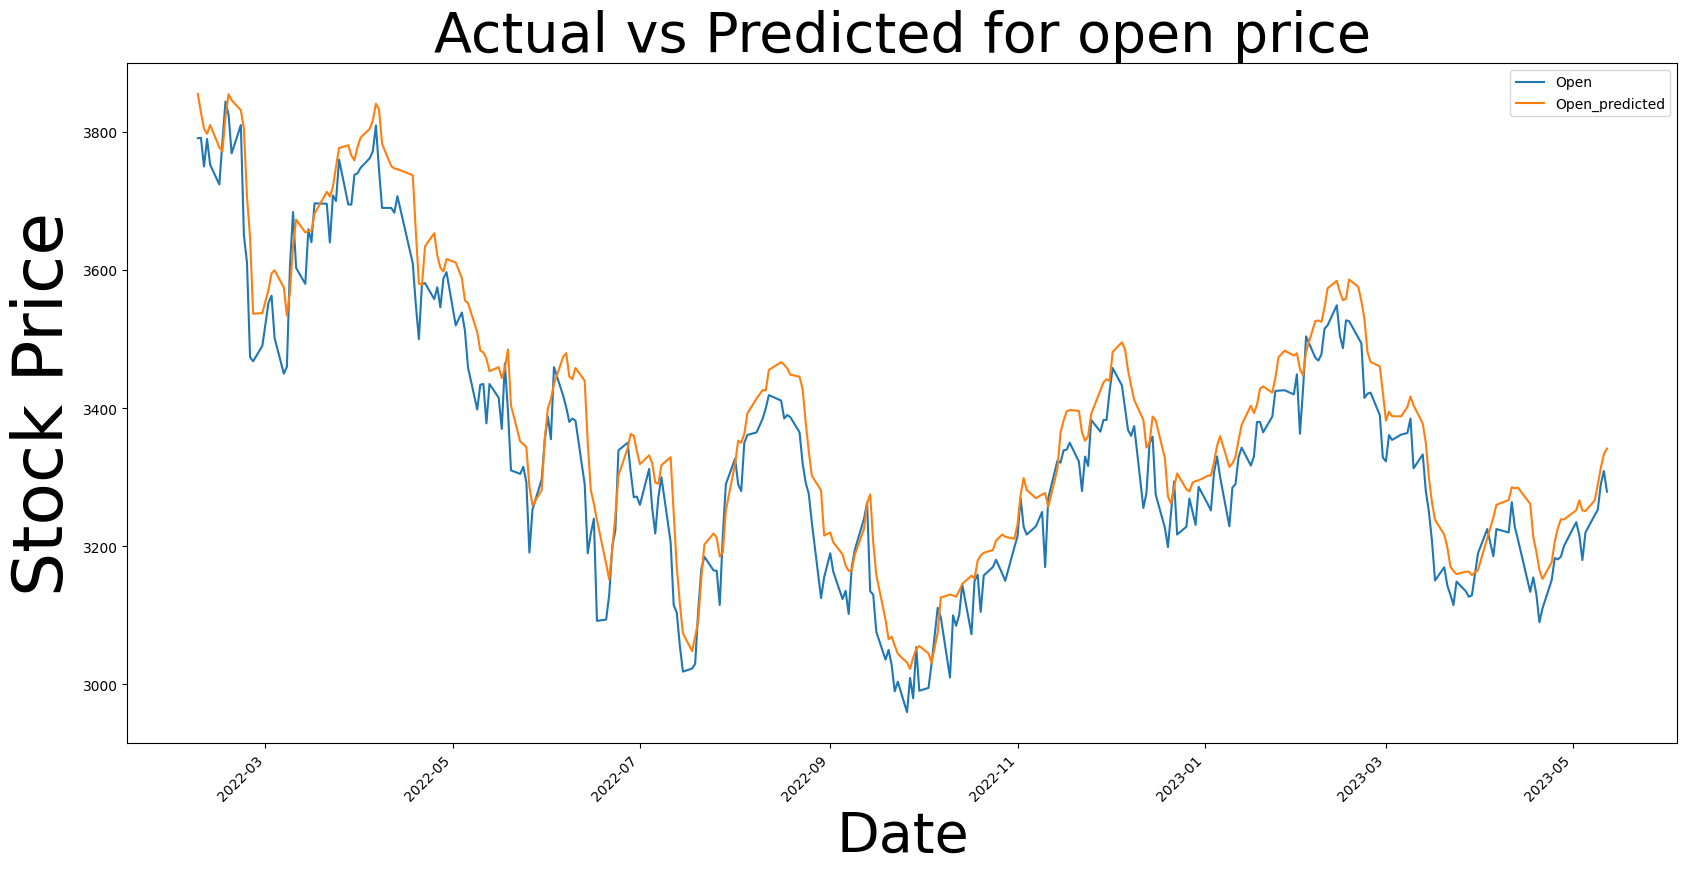

In [ ]:
gs_slic_data[['Open','Open_predicted']].plot(figsize=(20,10))
plt.xticks(rotation=45)
plt.xlabel('Date',size=40)
plt.ylabel('Stock Price',size=50)
plt.title('Actual vs Predicted for open price',size=40)
plt.show()

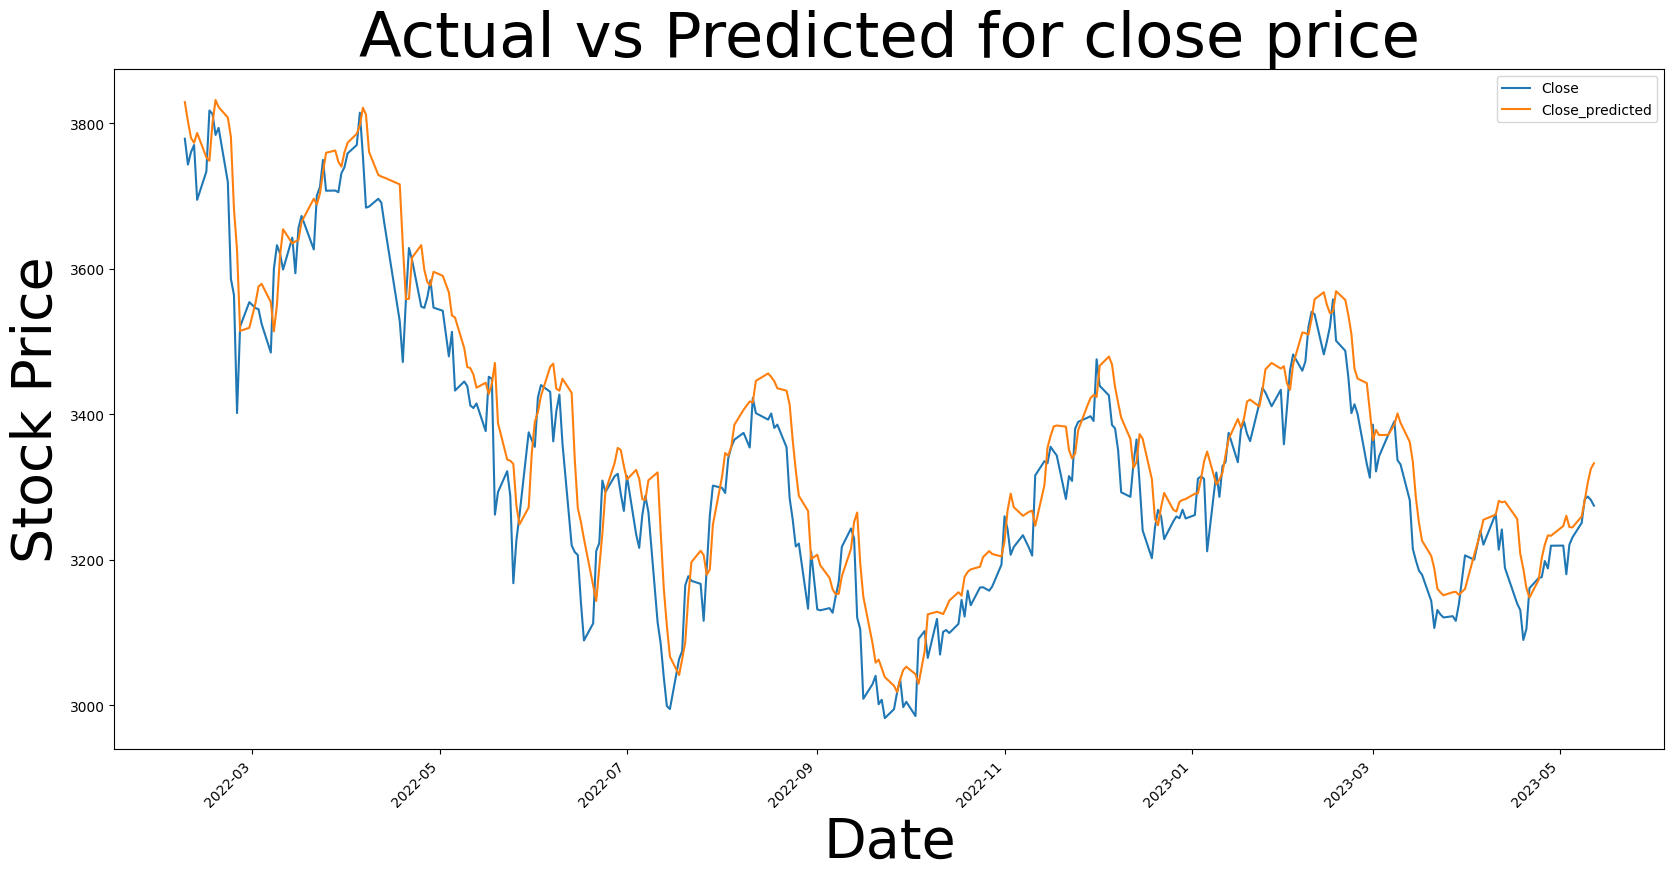

In [ ]:
gs_slic_data[['Close','Close_predicted']].plot(figsize=(20,10))
plt.xticks(rotation=45)
plt.xlabel('Date',size=40)
plt.ylabel('Stock Price',size=40)
plt.title('Actual vs Predicted for close price',size=45)
plt.show()

In [ ]:
# Creating a dataframe and adding 10 days to existing index 

gs_slic_data = gs_slic_data.append(pd.DataFrame(columns=gs_slic_data.columns,index=pd.date_range(start=gs_slic_data.index[-1], periods=11, freq='D', closed='right')))

<ipython-input-27-3796df6ba6f4>:3: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  gs_slic_data = gs_slic_data.append(pd.DataFrame(columns=gs_slic_data.columns,index=pd.date_range(start=gs_slic_data.index[-1], periods=11, freq='D', closed='right')))
<ipython-input-27-3796df6ba6f4>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gs_slic_data = gs_slic_data.append(pd.DataFrame(columns=gs_slic_data.columns,index=pd.date_range(start=gs_slic_data.index[-1], periods=11, freq='D', closed='right')))


In [ ]:
gs_slic_data['2021-04-01	':'2021-05-10']

,Open,Close,Open_predicted,Close_predicted


In [ ]:
upcoming_prediction = pd.DataFrame(columns=['Open','Close'],index=gs_slic_data.index)
upcoming_prediction.index=pd.to_datetime(upcoming_prediction.index)

In [ ]:
curr_seq = test_seq[-1:]

for i in range(-10,0):
  up_pred = model.predict(curr_seq)
  upcoming_prediction.iloc[i] = up_pred
  curr_seq = np.append(curr_seq[0][1:],up_pred,axis=0)
  curr_seq = curr_seq.reshape(test_seq[-1:].shape)

1/1 [==============================] - 0s 23ms/step


In [ ]:
upcoming_prediction[['Open','Close']] = MMS.inverse_transform(upcoming_prediction[['Open','Close']])

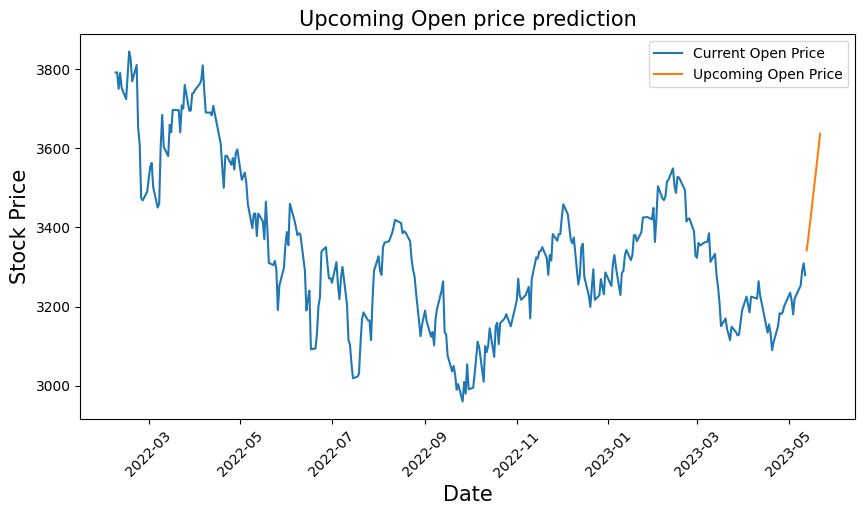

In [ ]:
fg,ax=plt.subplots(figsize=(10,5))
ax.plot(gs_slic_data.loc['2021-04-25':,'Open'],label='Current Open Price')
ax.plot(upcoming_prediction.loc['2021-04-25':,'Open'],label='Upcoming Open Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('Upcoming Open price prediction',size=15)
ax.legend()
fg.show()

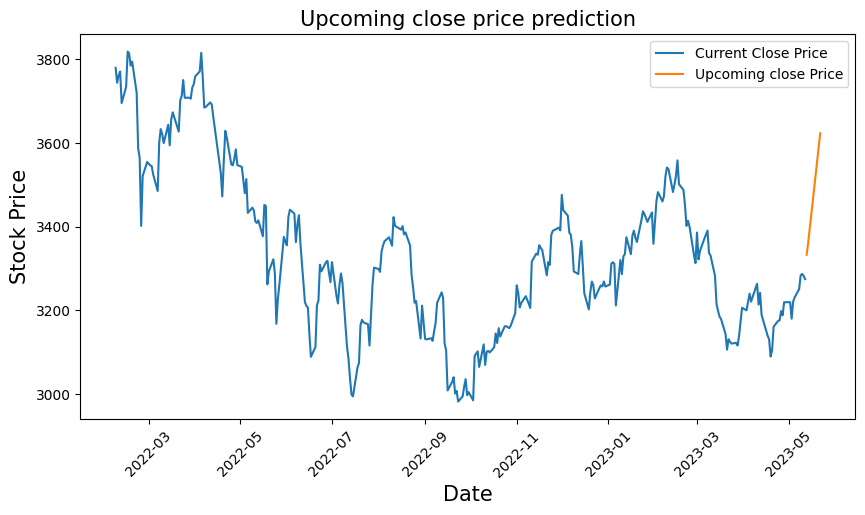

In [ ]:
fg,ax=plt.subplots(figsize=(10,5))
ax.plot(gs_slic_data.loc['2021-04-25':,'Close'],label='Current Close Price')
ax.plot(upcoming_prediction.loc['2021-04-25':,'Close'],label='Upcoming close Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('Upcoming close price prediction',size=15)
ax.legend()
fg.show()